<a href="https://colab.research.google.com/github/Elish-Ab/AI-Mastery-10x-Week1/blob/main/notebooks/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
!pip install sidetable
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load the data

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df.describe()

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

Numerical columns analysis

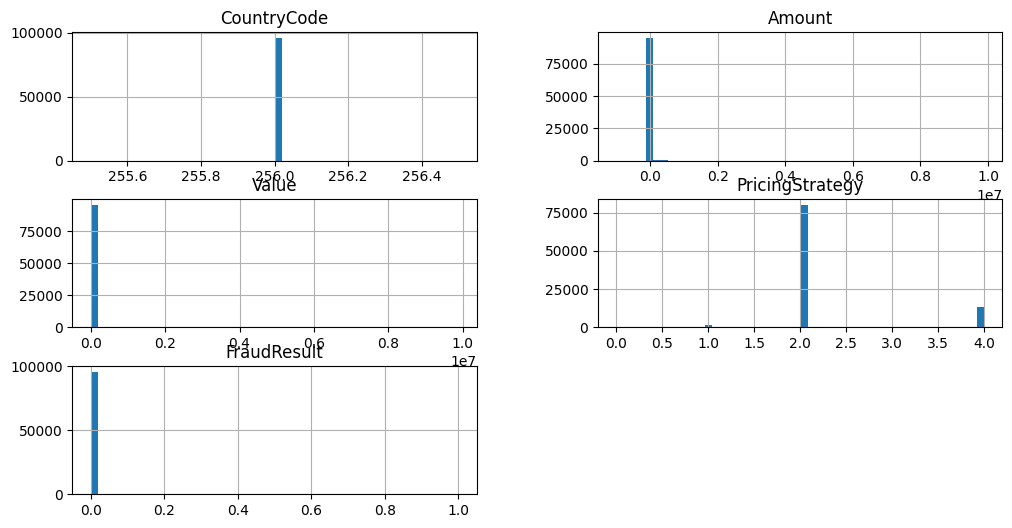

In [72]:
df_num = df.select_dtypes(include=['float64','int64'])
df_num.hist(figsize=(12,6), bins=50);

Object type columns analysis

In [73]:
df_cat = df.select_dtypes(include=['object'])
df_cat.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,ProviderId,ProductId,ProductCategory,ChannelId,TransactionStartTime
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,ProviderId_6,ProductId_10,airtime,ChannelId_3,2018-11-15T02:18:49Z
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T02:19:08Z
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,ProviderId_6,ProductId_1,airtime,ChannelId_3,2018-11-15T02:44:21Z
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,2018-11-15T03:32:55Z
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,ProviderId_4,ProductId_6,financial_services,ChannelId_2,2018-11-15T03:34:21Z


let's see which provider sales which product

In [74]:
df.stb.freq(['ProviderId','ProductId'], style= True)

,ProviderId,ProductId,count,percent,cumulative_count,cumulative_percent
0,ProviderId_4,ProductId_6,"32,629",34.11%,"32,629",34.11%
1,ProviderId_6,ProductId_3,"16,234",16.97%,"48,863",51.08%
2,ProviderId_6,ProductId_10,"10,585",11.06%,"59,448",62.14%
3,ProviderId_5,ProductId_15,"7,352",7.69%,"66,800",69.83%
4,ProviderId_5,ProductId_3,"3,691",3.86%,"70,491",73.69%
5,ProviderId_1,ProductId_15,"3,422",3.58%,"73,913",77.26%
6,ProviderId_4,ProductId_3,"2,927",3.06%,"76,840",80.32%
7,ProviderId_4,ProductId_10,"2,226",2.33%,"79,066",82.65%
8,ProviderId_6,ProductId_1,"1,911",2.00%,"80,977",84.65%
9,ProviderId_6,ProductId_4,"1,621",1.69%,"82,598",86.34%


In [75]:
df.stb.freq(['CurrencyCode'])

,CurrencyCode,count,percent,cumulative_count,cumulative_percent
0,UGX,95662,100.0,95662,100.0


In [76]:
df.stb.freq(['ChannelId'])

,ChannelId,count,percent,cumulative_count,cumulative_percent
0,ChannelId_3,56935,59.516841,56935,59.516841
1,ChannelId_2,37141,38.825239,94076,98.342079
2,ChannelId_5,1048,1.095524,95124,99.437603
3,ChannelId_1,538,0.562397,95662,100.000000


<Axes: xlabel='ProductCategory', ylabel='count'>

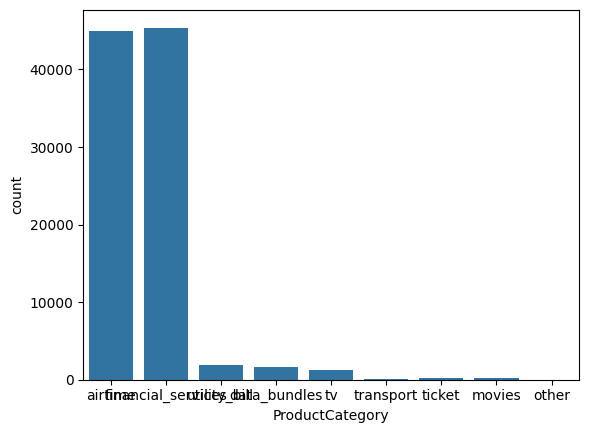

In [77]:

sns.countplot(x='ProductCategory', data=df)

Correlation of numeric columns

In [78]:
df_num.corr()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
CountryCode,NaN,NaN,NaN,NaN,NaN
Amount,NaN,1.000000,0.989692,-0.061931,0.557370
Value,NaN,0.989692,1.000000,-0.017020,0.566739
PricingStrategy,NaN,-0.061931,-0.017020,1.000000,-0.033821
FraudResult,NaN,0.557370,0.566739,-0.033821,1.000000


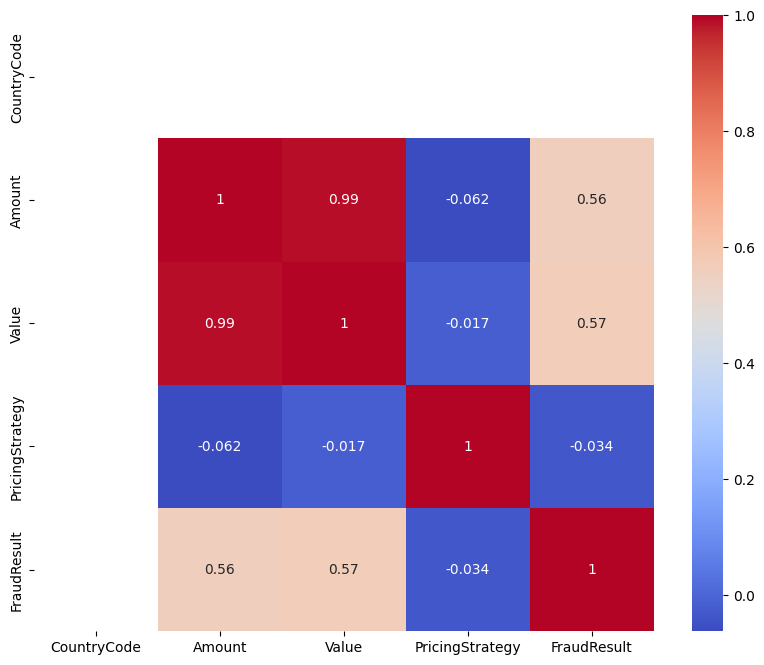

In [79]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df_num.corr(), cmap='coolwarm',
                   annot=True)

# Check for missing value

In [80]:
df.stb.missing()

,missing,total,percent
TransactionId,0,95662,0.0
BatchId,0,95662,0.0
AccountId,0,95662,0.0
SubscriptionId,0,95662,0.0
CustomerId,0,95662,0.0
CurrencyCode,0,95662,0.0
CountryCode,0,95662,0.0
ProviderId,0,95662,0.0
ProductId,0,95662,0.0
ProductCategory,0,95662,0.0


# Check for outliers

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

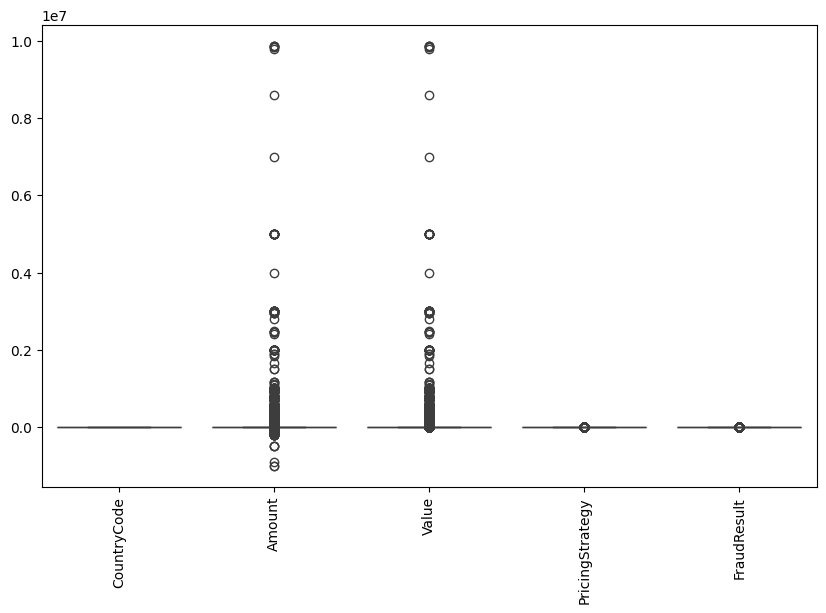

In [81]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_num)
plt.xticks(rotation=90)
plt.show()